In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt, __version__
import sys

## Stack of technologies

In [2]:
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", __version__)
print("Python version: ", sys.version)

Pandas version:  0.23.4
Numpy version:  1.15.4
Matplotlib version:  3.0.2
Python version:  3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
credit_data = pd.read_csv('../data_in/credit-data.csv')

In [4]:
credit_data.sample(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
35162,35163,0,0.055749,62,0,0.218833,4916.0,11,0,1,0,0.0
6067,6068,0,1.000000,48,0,403.000000,NaN,3,0,0,0,0.0
46478,46479,0,0.005900,70,0,0.001000,5000.0,3,0,0,0,0.0
73464,73465,0,0.587591,40,0,0.812013,6675.0,14,0,2,0,1.0
4702,4703,0,0.041832,72,0,0.263866,4236.0,5,0,1,0,1.0
27495,27496,0,0.100775,34,0,0.071998,10416.0,9,0,0,1,1.0
91534,91535,0,0.011256,37,0,0.200400,4500.0,6,0,1,0,3.0
1997,1998,0,0.442309,43,0,0.063498,5133.0,4,0,0,1,1.0
25746,25747,1,0.443647,56,2,0.846728,13400.0,19,0,6,0,1.0
10594,10595,1,0.631891,41,2,0.163562,9500.0,9,0,0,0,2.0


In [5]:
credit_data = credit_data.rename(columns={'unnamed: 0': 'borrower_id'})

## Cleaning data

### Check types of dataframe column values

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    150000 non-null int64
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


* Column **number_of_dependents** should be of type int64

In [7]:
credit_data['number_of_dependents'] = credit_data['number_of_dependents'].astype('int64')
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    150000 non-null int64
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null int64
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


### Check for duplicated entries

In [8]:
#Check size of the dataframe before drop duplicated rows
print(credit_data.shape)

(150000, 12)


In [9]:
#Drop duplicated rows
credit_data.drop_duplicates(keep='first', inplace=True)

In [10]:
#Check size of the dataframe after drop duplicated rows
print(credit_data.shape)

(150000, 12)


There are no duplicated entries in the dataset 

## Descriptive analysis

In [11]:
round(credit_data.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99]), 2)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,150000.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.74
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.11
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,1500.99,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,7500.95,0.00,0.00,29.00,0.00,0.00,1300.00,2.00,0.00,0.00,0.00,0.00
10%,15000.90,0.00,0.00,33.00,0.00,0.03,2005.00,3.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00


['revolving_utilization_of_unsecured_lines' 'age'
 'number_of_time30-59_days_past_due_not_worse' 'debt_ratio'
 'monthly_income' 'number_of_open_credit_lines_and_loans'
 'number_of_times90_days_late' 'number_real_estate_loans_or_lines'
 'number_of_time60-89_days_past_due_not_worse' 'number_of_dependents']


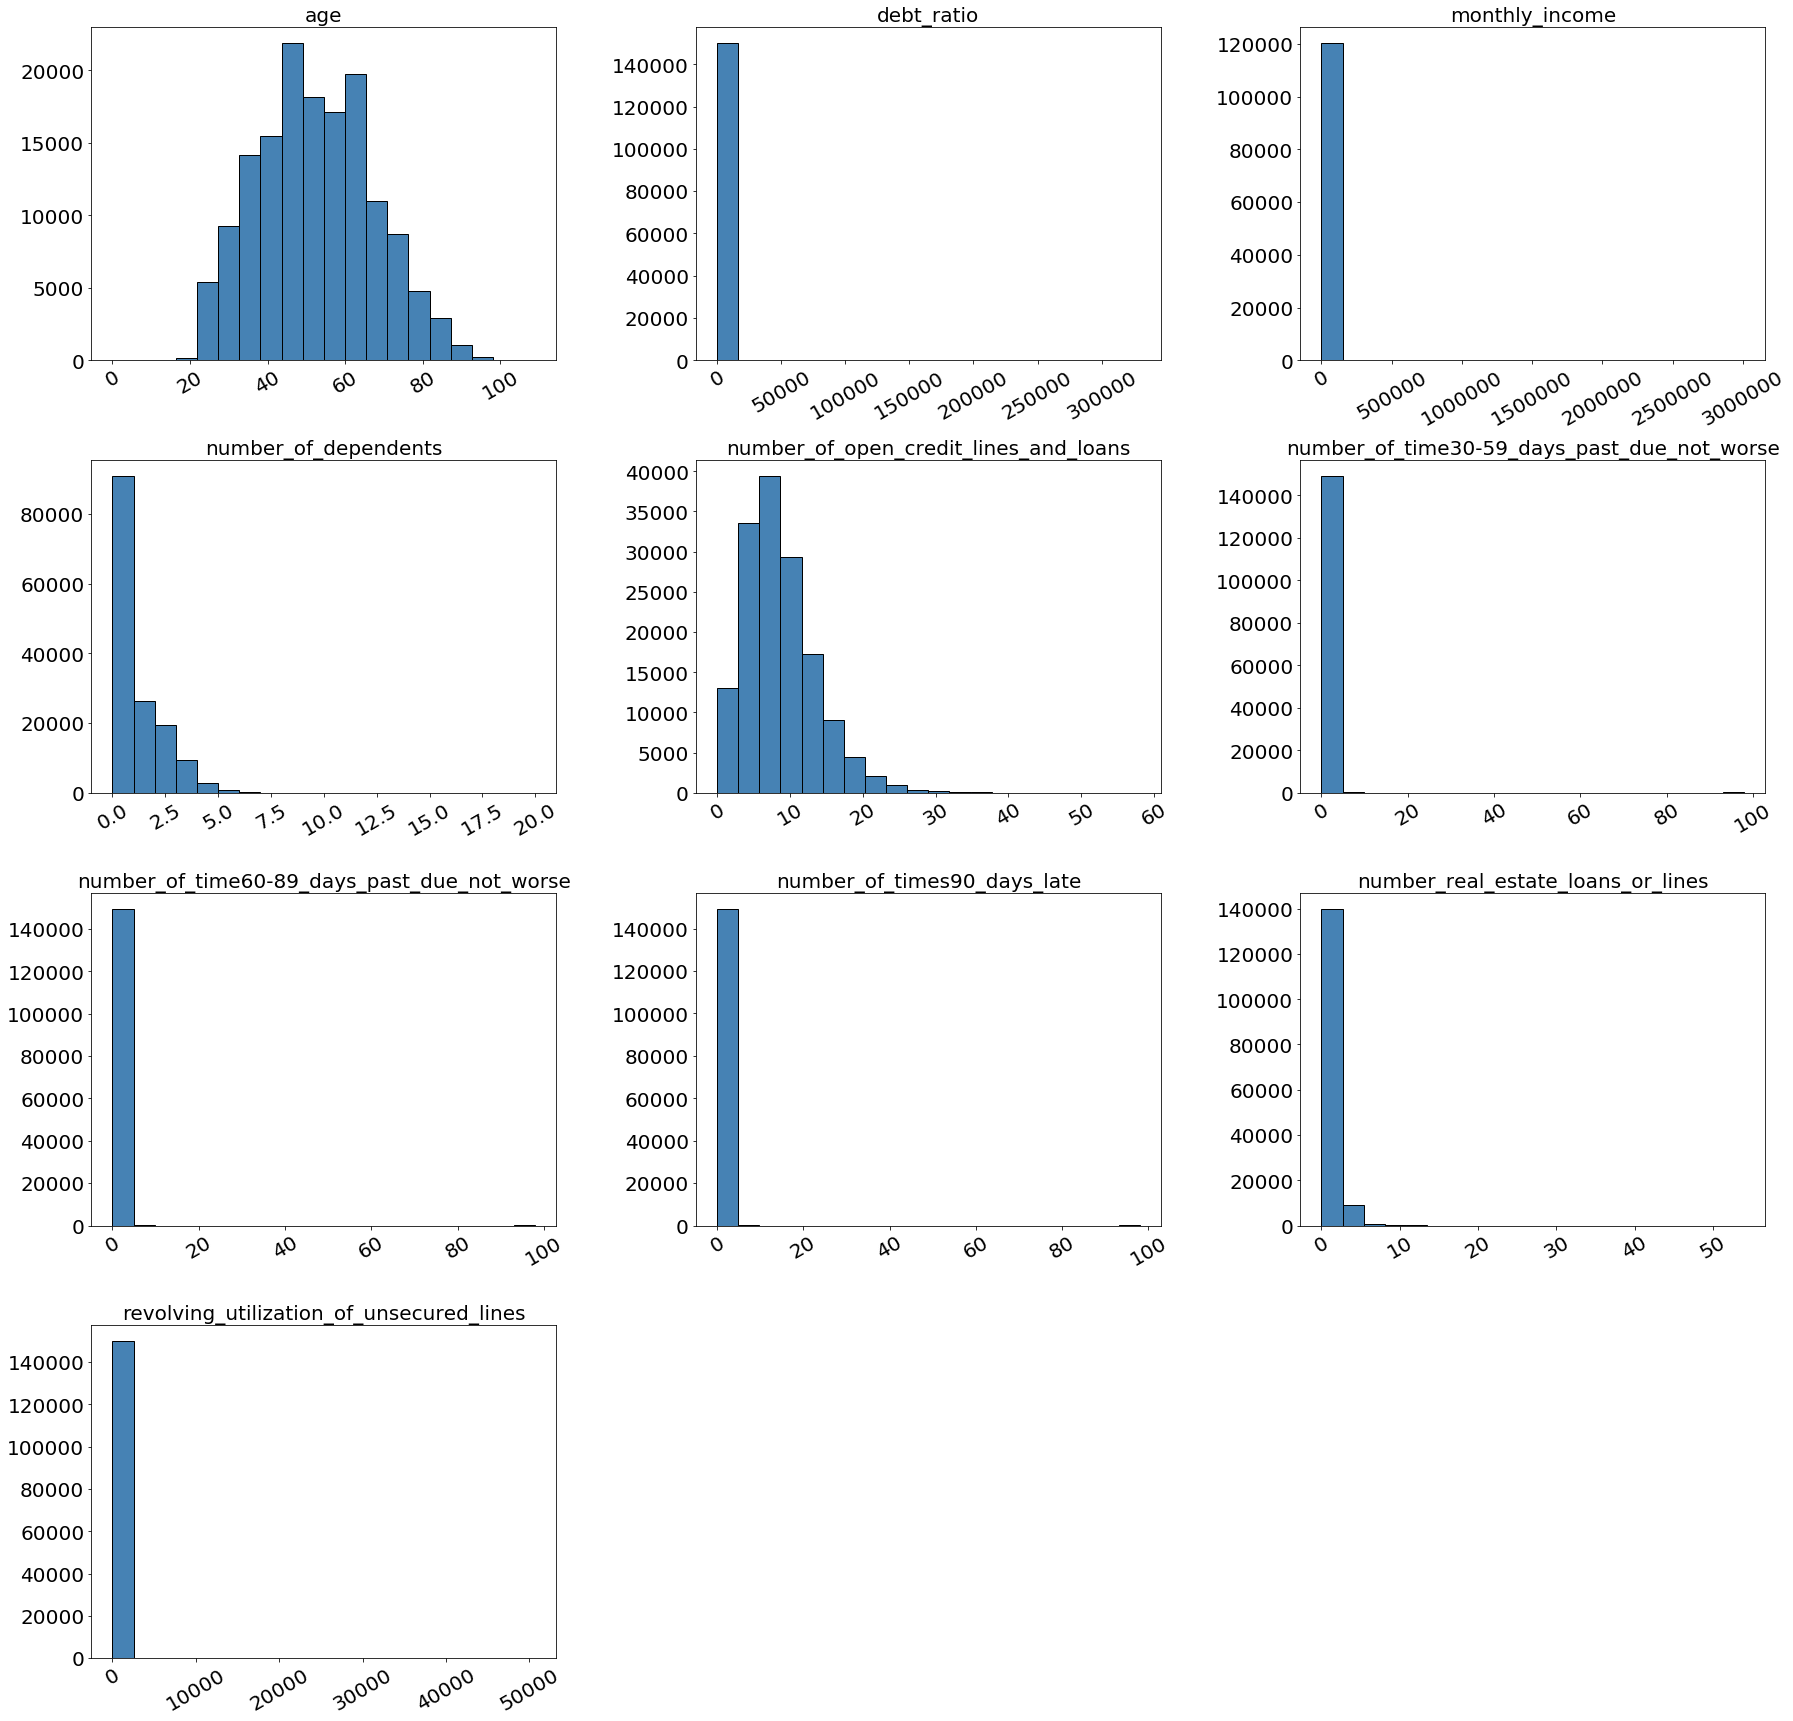

In [49]:
#Remove borrower_id column from plotting list
columns_to_plot= credit_data.columns.values[2:]
print(columns_to_plot)

ax = credit_data[columns_to_plot].hist(bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, figsize=(30,30),
           xlabelsize=20, ylabelsize=20, grid=False);

[x.title.set_size(20) for x in ax.ravel()];
[x.tick_params('x', labelrotation=30.0) for x in ax.ravel()];
plt.show()

As we can see from describe and histograms there are possible outliers

## Outliers analysis